In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [3]:
X.shape

(178, 13)

In [4]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
df = X.join(pd.Series(y, name='class'))

###Linear Discriminant Analysis can be broken up into the following steps:

Compute the within class and between class scatter matrices
Compute the Sw-1 * SB
Compute the eigen values and eigen vector of vector above
Sort the eigenvalues and select the top k
Create a new matrix containing eigenvectors that map to the k eigenvalues
Obtain the new features (i.e. LDA components) by taking the dot product of the data and the matrix from step 4
Within Class Scatter Matrix

In [9]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

C:\Users\Preeti.Ravikiran\AppData\Local\Temp\ipykernel_11228\3626696802.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()


,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


###Then, we plug the mean vectors (mi) into the equation from before in order to obtain the within class scatter matrix.

In [16]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
 rows = rows.drop(['class'], axis=1)
    
 s = np.zeros((13,13))
for index, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        
        s += (x - mc).dot((x - mc).T)
    
within_class_scatter_matrix += s

###Between Class Scatter Matrix
Next, we calculate the between class scatter matrix






In [17]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

C:\Users\Preeti.Ravikiran\AppData\Local\Temp\ipykernel_11228\1768122946.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means = df.mean()


###Then, we solve the generalized eigenvalue problem for


to obtain the linear discriminants.

In [18]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

###The eigenvectors with the highest eigenvalues carry the most information about the distribution of the data. Thus, we sort the eigenvalues from highest to lowest and select the first k eigenvectors. In order to ensure that the eigenvalue maps to the same eigenvector after sorting, we place them in a temporary array.

In [35]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

237.46123198302251
46.98285938758684
1.4023733817066513e-14
9.656100187754081e-15
8.842391076595326e-15
8.842391076595326e-15
6.567364239957433e-15
6.567364239957433e-15
4.435242673590706e-15
3.657987484308729e-15
3.657987484308729e-15
1.34120542977502e-15
0.0


In [36]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.8348256799387275
Eigenvector 1: 0.1651743200612724
Eigenvector 2: 4.9302250398285255e-17
Eigenvector 3: 3.3947269360476554e-17
Eigenvector 4: 3.1086569715643523e-17
Eigenvector 5: 3.1086569715643523e-17
Eigenvector 6: 2.3088418565181758e-17
Eigenvector 7: 2.3088418565181758e-17
Eigenvector 8: 1.559266937913615e-17
Eigenvector 9: 1.2860128212481112e-17
Eigenvector 10: 1.2860128212481112e-17
Eigenvector 11: 4.715181191890288e-18
Eigenvector 12: 0.0


In [28]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

In [29]:
X_lda = np.array(X.dot(w_matrix))

In [30]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

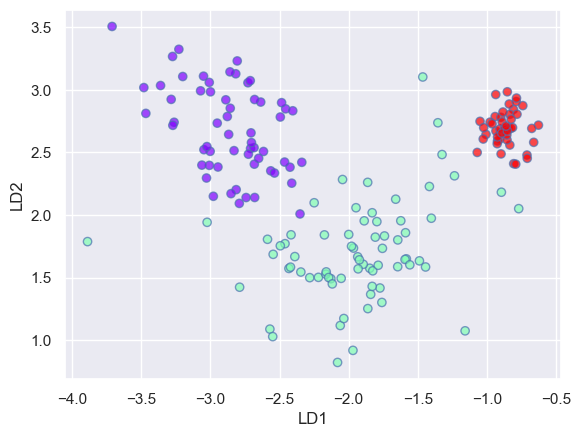

In [31]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

## Using predefined 'LinearDiscriminantAnalysis' class made available in scikit-learn library.

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [33]:
lda.explained_variance_ratio_

array([0.6875, 0.3125])

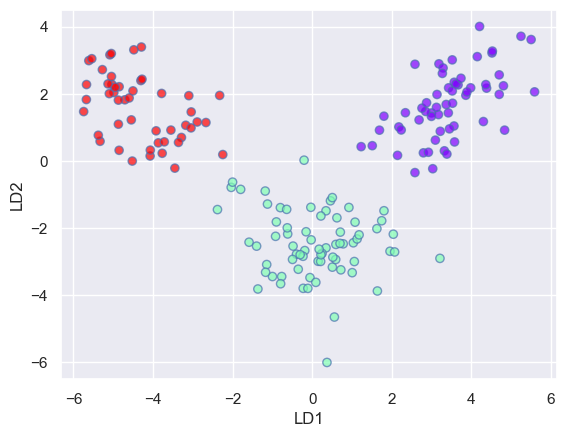

In [34]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

## LDA vs PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [38]:
pca.explained_variance_ratio_

array([0.9981, 0.0017])

##As we can see, PCA selected the components which would result in the highest spread (retain the most information) and not necessarily the ones which maximize the separation between classes.

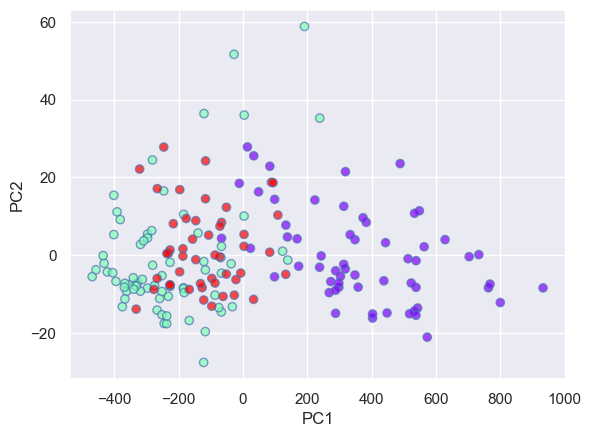

In [39]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [53]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [54]:
y_pred = lda.predict(X_test)
#print(accuracy_score(y_test,y_pred))

In [55]:
confusion_matrix(y_test,y_pred)

array([[18,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 10]], dtype=int64)